# Data Structures and Algorithms Assignment 1 - 13336431

Introduction: Data Structure is a way of collecting and organising data in such a way that we can perform operations on data in an effective and efficient manner. Data Structures is about ordering data elements in terms of some relationship, for better organization, time capacity and storage.

This assignment aims to display the results of implementing certain algorithms in python, interpreting the results and discuss the insights from these results from a data structures perspective.







In [2]:
#Import relevant modules

import time
import timeit
from time import perf_counter_ns
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, exp
from scipy.optimize import curve_fit

### Task 1 - Write an algorithm to compute the factorial of a positive integer 

Implemented from the lecture notes

Algorithm Iterative implementation of factorial
* 1: factorial iterative(n):
* Input: n a natural number
* Output: the n-th factorial number
* 2: fact ← n
* 3: while n > 1 do
* 4: n ← n-1
* 5: fact ← fact * n
* 6: endwhile
* 7: return fact

### Task 2 - Implement above algorithm using two approaches, iterative and recursive and plot running times as a function(n) 

In [3]:
#Implement iterative factorial algorithm

def iterative_fact (n):
    if n < 0:
        return "number has to be a positive integer" 
    fact = 1
    for number in range(1,n+1):
       fact = fact * number
    return fact              

In [4]:
#Implement recursive non-tail factorial algorithm
# The function is not tail recursive because the value returned by recursive_fact_nonTail(n-1) is used in recursive_fact_nonTail(n) and the function call to recursive_fact_nonTail(n-1) is not the last thing done by recursive_fact_nonTail(n)


def recursive_fact_nonTail(n):
    if n == 0: 
        return 1
    else: 
        return recursive_fact_nonTail(n - 1) * n

In [5]:
#Implement recursive tail factorial algorithm
# The function is tail recursive because the value returned by recursive_fact_tail(n-1) is not used in recursive_fact_tail(n, a=1)
#Use an accumulator 'a'


def recursive_fact_tail(n, a = 1):
    if n == 0:
        return a
    return recursive_fact_tail(n - 1, n * a)

### Discussion - Task 2

Factorial is the product of all positive integers less than or equal to a given positive integer.

Iterative factorial: The iterative factorial algorithm uses a for loop to calculate the product of all positive integers less than or equal to n.

Recursive factorial: The recursive factorial algorithm uses a statement in a function which repeatedly calls itself to calculate the product of all positive integers less than equal to n.

The difference between tail recursion and non-tail recursion is that in tail recursion, you don't store the state of a function's value i.e (n-1) is not returned, So when nothing is left to do after coming back from the recursive call, that is called tail recursion. Whereas in case of non-tail recursion the function's value is passed to the parent which means that the values can then be calculated.

Summary: A function call is said to be tail recursive if there is nothing to do after the function returns except return its value. A function is non tail recursive if there is some sort of computing processing
done after the function returns.

In [8]:
#create function to compute the running times of programmes so it is easier to get the running times in one function, 
#created a method that could compute running times of functions with an element and without an element so it could cater for all functions
#manipulated from lecture notes
def running_time(input_array, func_name, elem = None):
    times = []
    
    if elem is None:
        for val in input_array:
            start = time.perf_counter_ns()
            from IPython.utils import io as iuio
            with iuio.capture_output() as suppressed:
                if isinstance(val, tuple):
                    _ = func_name(*val)
                else:
                    _ = func_name(val)

            times.append((time.perf_counter_ns() - start)) # 10e9 converts unit from second to nanosecond
        return times
    else:
        start = time.perf_counter_ns()
        from IPython.utils import io as iuio
        with iuio.capture_output() as suppressed:
            if isinstance(input_array, tuple):
                _ = func_name(*input_array, elem)
            else:
                _ = func_name(input_array,elem)

        times.append((time.perf_counter_ns() - start)) # 10e9 converts unit from second to nanosecond
        return times

my_arr = [10,100,1000,3000,5000,8000,10000]
my_arr_2 = [10,100,200,500,1000,2000,2500]

times_fact_iterative=running_time(my_arr, iterative_fact)
times_fact_nonTail = running_time(my_arr_2, recursive_fact_nonTail)
times_fact_tail = running_time(my_arr_2, recursive_fact_tail)
times_fact_iterative_2 = running_time(my_arr_2, iterative_fact)

#print the running times of all algorithm implementations

print(times_fact_tail)
print(times_fact_nonTail)
print(times_fact_iterative)
print(times_fact_iterative_2)

        

[323954, 262784, 288239, 522936, 1035140, 3217312, 5538327]
[545507, 264976, 271515, 673141, 729498, 1898789, 2656745]
[363908, 257809, 1262720, 2502297, 6539418, 17003888, 25103476]
[331995, 248157, 256581, 308493, 556046, 1335233, 2790498]


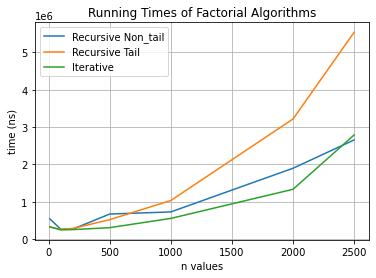

<Figure size 432x288 with 0 Axes>

In [9]:
#plot the running times of the algorithms above

plt.plot(my_arr_2,times_fact_nonTail,label='Recursive Non_tail')
plt.plot(my_arr_2,times_fact_tail,label='Recursive Tail')
plt.plot(my_arr_2,times_fact_iterative_2,label='Iterative')
plt.xlabel('n values')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Factorial Algorithms')
plt.grid()
plt.show()
plt.savefig('Running_Times_Fact_Algorithms_1.png')

## Discussion - Task 2

Runningtime = operation × activations

Recursive Factorials: the algorithm is linear, running in O(n) time. This is the case because it executes once every time it decrements the value n, and it decrements the value n until it reaches 0, resulting in the function being called recursively n times.

The tail recursion is slightly quicker than non-tail recursion for values of n up to 2000. The tail recursion is an optimised recursive algorithm that can behave similarly to the iterative algorithm. As there is no task left after the recursive call, the compiler optimizes the code quicker. When one function is called, its address is stored inside the stack. So if it is tail recursion, then storing addresses into stack is not needed. Tail recursion is usually more efficient than non tail recursion. The recursive calls do not need to be added to the call stack.

Iterative Factorial: the algorithm is also linear, running in O(n) time. The reasoning for the iterative version is basically the same as for the recursive version: the loop runs in O(1) time and is executed n times.

However the iterative version runs in O(1) space, while the recursive algorithm uses O(n) stack space. This ultimately means that the iterative algorithm is quicker than the recursive algorithms. 



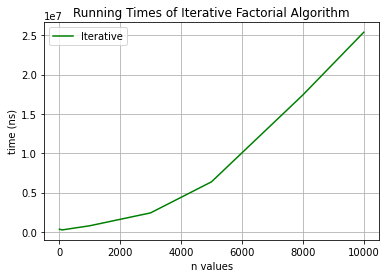

In [10]:
#plot the running times of the iterative factorial algorithms with a larger array

plt.plot(my_arr,times_fact_iterative,label='Iterative', c = "g")
plt.xlabel('n values')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Iterative Factorial Algorithm')
plt.grid()
plt.show()


## Discussion

From the graph, it is evident the algorithm behaves linearly, as the n values increase, the longer it takes to perform the factorial of that n value.

## Task 3 - Implement with two methods from:  linearsearch, iterative binary and recursive binary

In [11]:
#binary search algorithm to check if an element is in the input array and the position
#recursive binary function calls the function continuously and does not use loops


def binary_search_recursive(arr, elem, start=0, end=None):
    if end is None:
        end = len(arr) - 1
    if start > end:
        return False

    mid = (start + end) // 2
    if elem == arr[mid]:
        return mid
    if elem < arr[mid]:
        return binary_search_recursive(arr, elem, start, mid-1)
     
    return binary_search_recursive(arr, elem, mid+1, end)


my_arr_2 = [10,100,200,500,1000,2000,2500]
#my_arr_2 is the input sequence
#check if 200 is in the array input
bin_search_rec = binary_search_recursive(my_arr_2 ,200)
bin_search_rec_2 = binary_search_recursive(my_arr_2 ,300)
print(bin_search_rec)
print(bin_search_rec_2)



2
False


In [12]:
#binary search algorithm to check if an element is in the input array and the position
#iterative binary function calls the function continuously and does uses a while loop

def binary_search_iterative(data, element):
  
  low = 0
  high = len(data)-1
  while low <= high:
    mid = (low + high) // 2
    if element == data[mid]:         # found a match
      return mid
    elif element < data[mid]:
      high = mid - 1                # only consider values left of mid
    else:
      low = mid + 1                 # only consider values right of mid
  return False  

bin_search_iter = binary_search_iterative(my_arr_2 ,200)
bin_search_iter_2 = binary_search_iterative(my_arr_2 ,300)

print(bin_search_iter)
print(bin_search_iter_2)



2
False


In [14]:
#linear search algorithm searches through each element in a list to find the target element using a for loop

def linearsearch(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return False

In [15]:
#testing linearsearch programmes with values 200 and 300 to see if they are in my_arr_2

linear_search = linearsearch(my_arr_2 ,200)
linear_search_2 = linearsearch(my_arr_2 ,300)
print(linear_search)
print(linear_search_2)


2
False


In [16]:
#checking running times of all three approaches to search algorithms

times_bin_iterative = running_time(my_arr_2, binary_search_iterative,200)
times_bin_recursive = running_time(my_arr_2, binary_search_recursive, 200)
times_linear = running_time(my_arr_2, linearsearch, 200)

print(times_bin_iterative)
print(times_bin_recursive)
print(times_linear)


[347519]
[250918]
[239592]


## Task 4 - Implement Best and Worst Case Running Times with two methods from:  linearsearch, iterative binary and recursive binary


For the purpose of this task, I used the linear search and iterative binary approach

In [17]:
# created a function to test best case running times of linear search algorithms

def bestcase_time(func_name):
    arr1 = list(range(100))
    arr2 = list(range(500))
    arr3 = list(range(1000))
    arr4 = list(range(2000))
    arr5 = list(range(4000))
    arr6 = list(range(6000))
    arr7 = list(range(8000))
    arr8 = list(range(10000))

    arrays = [arr1, arr2, arr3, arr4, arr5,arr6, arr7, arr8]

    array_length = len(arrays)
    bestTimes = []
    
    for x in range(array_length):
        array = arrays[x]
        lastValue = array[len(array)-1]
        firstValue = array[0]
        bestTime = 0

        for x in range(100):
            t1_start = perf_counter_ns()
            func_name(array, firstValue)
            t1_stop = perf_counter_ns()
            bestTime += t1_stop - t1_start
            
        bestTimes.append(bestTime/100)
    return bestTimes 
    
        
best_case_linear = bestcase_time(linearsearch) 
print(best_case_linear)

[530.82, 580.27, 574.61, 576.51, 580.88, 578.65, 616.77, 576.76]


In [29]:
# created a function to test worst case running times of binary iterative and linear search algorithms

def worstcase_time(func_name):
    arr1 = list(range(100))
    arr2 = list(range(500))
    arr3 = list(range(1000))
    arr4 = list(range(2000))
    arr5 = list(range(4000))
    arr6 = list(range(6000))
    arr7 = list(range(8000))
    arr8 = list(range(10000))

    arrays = [arr1, arr2, arr3, arr4, arr5,arr6, arr7, arr8]

    array_length = len(arrays)
    worstTimes = []
    
    for x in range(array_length):
        array = arrays[x]
        lastValue = array[len(array)-1]
        firstValue = array[0]
        worstTime = 0

        for x in range(100):
            t1_start = perf_counter_ns()
            func_name(array, lastValue)
            t1_stop = perf_counter_ns()
            worstTime += t1_stop - t1_start
            
        worstTimes.append(worstTime/100)
    return worstTimes 
    
        
worst_case_linear = worstcase_time(linearsearch) 
worst_case_bin_iterative = worstcase_time(binary_search_iterative)

print(worst_case_linear)
print(worst_case_bin_iterative)

[10800.39, 60612.59, 132871.85, 157093.8, 1173674.02, 1524697.98, 883845.75, 985699.14]
[1834.46, 2978.12, 4359.72, 4205.53, 11905.48, 4126.37, 3060.49, 3291.37]


In [30]:
#get indexes for plotting plots

arr1 = list(range(100))
arr2 = list(range(500))
arr3 = list(range(1000))
arr4 = list(range(2000))
arr5 = list(range(4000))
arr6 = list(range(6000))
arr7 = list(range(8000))
arr8 = list(range(10000))
arrays = [arr1, arr2, arr3, arr4, arr5,arr6, arr7, arr8]

array_length = len(arrays)
Indexes = []

for x in range(array_length):
        array = arrays[x]
        Indexes.append(len(array))
        
print(Indexes)

[100, 500, 1000, 2000, 4000, 6000, 8000, 10000]


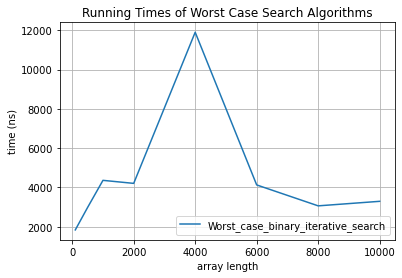

<Figure size 432x288 with 0 Axes>

In [31]:
#plot worst case running times of Search Algorithms


plt.plot(Indexes, worst_case_bin_iterative, label = 'Worst_case_binary_iterative_search')
# plt.plot(Indexes, worst_case_linear, label = 'Worst_case_linear_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Worst Case Search Algorithms')
plt.grid()
plt.show()
plt.savefig('Running_Times_Worst_Case_binary__iterative_Algorithm_1.png')

In [ ]:
#plt.plot(Indexes, worst_case_bin_iterative, label = 'Worst_case_binary_iterative_search')
plt.plot(Indexes, worst_case_linear, label = 'Worst_case_linear_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Worst Case Search Algorithms')
plt.grid()
plt.show()
#plt.savefig('Running_Times_Worst_Case_linear_Search_Algorithm_1.png')

In [ ]:
plt.plot(Indexes, worst_case_bin_iterative, label = 'Worst_case_binary_iterative_search')
plt.plot(Indexes, worst_case_linear, label = 'Worst_case_linear_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Worst Case Search Algorithms')
plt.grid()
plt.show()
#plt.savefig('Running_Times_Worst_Case_Search_Algorithms_1.png')

In [ ]:
#I created a bestcase_time binary function because the best case for binary and linear algorithms are different
#best case for binary is having the target element as the middle element in the array and
#best case for the linear search is having the target element as the first element in the array

def bestcase_time_binary(func_name):
    arr1 = list(range(100))
    arr2 = list(range(500))
    arr3 = list(range(1000))
    arr4 = list(range(2000))
    arr5 = list(range(4000))
    arr6 = list(range(6000))
    arr7 = list(range(8000))
    arr8 = list(range(10000))

    arrays = [arr1, arr2, arr3, arr4, arr5,arr6, arr7, arr8]

    array_length = len(arrays)
    bestIndexes = []
    bestTimes = []
   
    
    for x in range(array_length):
        array = arrays[x]
        bestIndexes.append(len(array))
        mid = len(array)-1
        midValue = mid//2
        firstValue = array[midValue]
        bestTime = 0
       

        for x in range(100):
            t3_start = perf_counter_ns()
            func_name(array, firstValue)
            t3_stop = perf_counter_ns()
            bestTime += t3_stop - t3_start
        
            
        bestTimes.append(bestTime/100)
    return bestTimes 

best_case_bin_iterative = bestcase_time_binary(binary_search_iterative)
best_case_linear = bestcase_time(linearsearch)


In [ ]:
#plot best case running times of Search Algorithms

plt.plot(Indexes, best_case_bin_iterative, label = 'best_case_binary_iterative_search')
plt.plot(Indexes, best_case_linear, label = 'best_case_linear_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Best Case Search Algorithms')
plt.grid()
plt.show()
#plt.savefig('Running_Times_Best_Case_Search_Algorithms_1.png')


In [ ]:
#plot best and worst case running times of Search Algorithms

plt.plot(Indexes, best_case_bin_iterative, label = 'best_case_binary_iterative_search')
plt.plot(Indexes, worst_case_bin_iterative, label = 'worst_case_binary_iterative_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Best and Worst Case Binary Iterative Search Algorithms')
plt.grid()
plt.show()
#plt.savefig('Running_Times_Best_and_worst_Case_Binary_Iterative_Search_Algorithms_1.png')

In [ ]:
#plot best and worst case running times of Search Algorithms

plt.plot(Indexes, worst_case_linear, label = 'worst_case_linear_search')
plt.plot(Indexes, best_case_linear, label = 'best_case_linear_search')
plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Running Times of Best and Worst Case Linear Search Algorithms')
plt.grid()
plt.show()
#plt.savefig('Running_Times_Best_and_worst_Case_Linear_Search_Algorithms_1.png')

## Discussion - Task 4
Time Complexity:
* The time complexity is the number of operations an algorithm performs to complete its task (considering that each operation takes the same amount of time). The algorithm that performs the task in the smallest number of operations is considered the most efficient one in terms of the time complexity and in this case the best case running time.

* Additionally, the algorithm that performs the task in the largest number of operations is considered the least efficient one in terms of the time complexity and in this case the worst case running time.

Binary Iterative Search Algorithm:
* Best case running times for binary iterative search algorithms involve the programme finding the target element in the first loop, because the binary iterative algorithm works by searching for the element in the middle of the array in the first loop, the best case running time would occur when the target element is the middle value in the array. This means that the running times stay constant and don't increase with the number of loops to search for the target element as the target is found in the first loop and thus the best case time in the graph above shows a horizontal linear line. 

* On the contrary, worst case running times for binary iterative search algorithms involve the programme finding the target element in either the first or last position of the array. If the target element is not the middle value in the array, the programme works to the left and right of the array until the target element is found. This would mean that the element is found at the last loop, whereby the running times increase after n value increases. This is the worst case running time and can be seen in the graph above where the running times tend to increase with n value increase.

* Binary search has time complexity O(log n).



Linear Search Algorithm:
* Best case running times for linear search algorithms involve the programme finding the target element in the first loop, because the linear search algorithm works by searching for the element in the first position in the first loop and then moves to the next position until it finds the element, the best case running time would occur when the target element is the first element in the array. This means that the running times stay constant and don't increase with the number of loops to search for the target element as the target is found in the first loop and thus the best case time in the graph above shows a horizontal linear line. 

* On the contrary, worst case running times for linear search algorithms involve the programme finding the target element in the last position of the array. If the target element is not the first value in the array, the programme works to the right of the array until the target element is found. This would mean that the element is found at the last loop, whereby the running times increase after n value increases. This is the worst case running time and can be seen in the graph above where the running times tend to increase with n value increase. The worst case complexity is  O(n).

* Linear search algorithms operate in O(n) time. The body of the loop runs in O(1) time and is executed n times.



## Task 5 - Use curve - fitting algorithms to find the equation of the running times obtained from Tasks 2-4

In [ ]:
# got the curve_fit information from https://machinelearningmastery.com/curve-fitting-with-python/
#function for worst case linear search algorithm

def func(x, a, b):
    return a*x+b


yData = np.array(worst_case_linear)
print(yData)
xData = np.array(Indexes)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Worst Case Linear Search Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted_worst_Case_Linear_Search_Algorithm_1.png')

In [ ]:
#function for worst case binary iterative search algorithm

def func(x, a, b, c):
    return a*x**2+b*x+c


yData = np.array(worst_case_bin_iterative)
print(yData)
xData = np.array(Indexes)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Worst Case Binary Search Iterative Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted_worst_Case_Bin_iterative_Search_Algorithm_1.png')

In [ ]:
#function for best case binary linear search algorithm

def func(x, a, b):
    return a*x+b


yData = np.array(best_case_linear)
print(yData)
xData = np.array(Indexes)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Best Case Linear Search Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted_Best_Case_Linear_Search_Algorithm_1.png')

In [ ]:
#function for fitted best case binary iterative algorithm

def func(x, a, b, c):
    return a*x**2+b*x+c


yData = np.array(best_case_bin_iterative)
print(yData)
xData = np.array(Indexes)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Best Case Binary Search Iterative Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted_Best_Case_Bin_iterative_Search_Algorithm_1.png')

In [ ]:
#function for fitted factorial tail recursive algorithm

def func(x, a, b):
    return a*x+b


yData = np.array(times_fact_tail)
print(yData)
xData = np.array(my_arr)
print(yData)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Running Times of Factorial Tail Recursive Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted Running Times of Factorial Tail Recursive Algorithm.png')

In [ ]:
#function for fitted factorial non-tail recursive algorithm

def func(x, a, b):
    return a*x+b


yData = np.array(times_fact_nonTail)
print(yData)
xData = np.array(my_arr)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Running Times of Factorial Non Tail Recursive Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted Running Times of Factorial Non Tail Recursive Algorithm.png')

In [ ]:
#function for fitted factorial iterative algorithm

def func(x, a, b):
    return a*x+b


yData = np.array(times_fact_iterative_2)
print(yData)
xData = np.array(my_arr)

plt.plot(xData, yData, 'bo', label = 'experimental-data')


popt, pcov = curve_fit(func, xData, yData)

xFit = np.arange(0.0, 10000, 10)

plt.plot(xFit, func(xFit, *popt), 'r', label = 'fitted params'.format(tuple(popt)))

plt.xlabel('array length')
plt.ylabel('time (ns)')
plt.legend()
plt.title('Fitted Running Times of Factorial Iterative Algorithm')
plt.grid()
plt.show()
#plt.savefig('Fitted Running Times of Factorial Iterative Algorithm.png')

## Discussion - Task 5

Line of best fit refers to a line through a scatter plot of data points that conveys the relationship between those points. A line of best fit is often useful to attempt to represent data with the equation of a straight line in order to predict values that might not be displayed on the plot. The line of best fit is determined by the correlation between the two variables on a scatter plot. The stronger positive correlation indicates a strong relationship between the two variables, i.e as n values increase, running times also increase. 

Best Case Algorithms:
* The curve fitting of the best case binary iterative and linear search algorithms show that the experimental data is more horizontal in it's shape as the running times do not tend to increase linearly with the increase in length of the array. This suggests a weak relationship between running times and length of array as the algorithms find the target element in the first loop.

Worst Case Algorithms:
* The curve fitting of the worst case binary iterative and linear search algorithms show that the running times do tend to increase linearly with the increase in array length. This suggests a strong relationship between running times and length of array as the algorithms find the target element in the last loop meaning the algorithm searching for values of increasing size until it finds the target element.

Factorial Recursive Algorithms:
* The curve fitting of the factorial recursive algorithm running times versus n values expresses a positive linear relationship, as the n values increase so do the factorial values of the n values which involves an increase in computing times. This suggests a strong relationship between running times and the factorial of n values.

Factorial Iterative Algorithms:
* The curve fitting of the factorial iterative algorithm running times versus n values expresses a positive linear relationship, as the n values increase so do the factorial values of the n values which involves an increase in computing times. This suggests a strong relationship between running times and the factorial of n values. 

## Conclusion

* Factorial Recursion and iterative runs in o(n) time, with iterative having the quicker running times due to the fact that the iterative algorithm runs in O(1) space, while the recursive algorithm uses O(n) stack space. This ultimately means that the iterative algorithm is quicker than the recursive algorithms. 

* Linear search algorithms run in O(n) time and binary algorithms run in O(log(n)) time and if arrays are sorted binary searches run quicker than linear searches.

* Best fit curves show how strong the relationship between two variables is such as n values and running times and length of arrays and running times. Strong relationships are evident in factorial recursive and iterative algorithms and running times and worst case binary and linear searches but weak relationships are shown in best case running times in binary searches and linear searches.


